In [3]:
import sys
sys.path.insert(1, 'D:\\Project\\tabint')

In [7]:
import random

In [4]:
import tabint
from tabint.utils import *
from tabint.dataset import *
from tabint.feature import *
from tabint.pre_processing import *
from tabint.visual import *
from tabint.learner import *
from tabint.interpretation import *
from tabint.inference import *

C:\Users\Dell\Anaconda3\envs\zero\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
import numpy as np

# Permutation test

## dev lib

In [1]:
treatment = [ 28.44,  29.32,  31.22,  29.58,  30.34,  28.76,  29.21,  30.4 ,
              31.12,  31.78,  27.58,  31.57,  30.73,  30.43,  30.31,  30.32,
              29.18,  29.52,  29.22,  30.56]
control = [ 33.51,  30.63,  32.38,  32.52,  29.41,  30.93,  49.78,  28.96,
            35.77,  31.42,  30.76,  30.6 ,  23.64,  30.54,  47.78,  31.98,
            34.52,  32.42,  31.32,  40.72]

In [8]:
x = treatment
y = control

In [47]:
def list_to_np_array(x): return np.array(x) if type(x) is list else x

In [108]:
class Permutation_test:
    def __init__(self, x, y, func = np.mean, num_samples = 10000):
        self.x, self.y = list_to_np_array(x), list_to_np_array(y)
        self.nx, self.ny = len(x), len(y)
        self.xy = np.hstack([x,y])
        self.func = func
        self.num_samples = num_samples
        self.ground_truth = self.compute_difference(False)
        self.permutation_result = self.run_permutation()
        self.p_value_calculation()
    
    def random_shuffle(self, random_shuffle = True):
        if random_shuffle: np.random.shuffle(self.xy)
        return self.xy[:self.nx], self.xy[-self.ny:]
        
    def compute_difference(self, random_shuffle = True):
        x_p, y_p = self.random_shuffle(random_shuffle = random_shuffle)
        return self.func(x_p) - self.func(y_p)
    
    def run_permutation(self): 
        ground_truth = []
        for i in range(self.num_samples): ground_truth.append(self.compute_difference())
        return list_to_np_array(ground_truth)
    
    def p_value_calculation(self):
        self.p_value_one_side = (len(np.where(self.permutation_result <= self.ground_truth)[0]) if self.ground_truth < 0 else len(np.where(self.permutation_result >= self.ground_truth)[0]))/self.num_samples
        self.p_value_two_sides = len(np.where(np.abs(self.permutation_result) >= np.abs(self.ground_truth))[0])/self.num_samples
            
    def distribution_plot(self):
        #pdb.set_trace()
        permutation_result_pos = self.permutation_result[self.permutation_result >= 0]
        permutation_result_neg = np.abs(self.permutation_result[self.permutation_result < 0])
        
        print("Ground truth:", '%.2f' % self.ground_truth, '\n')
        print("P value one side:", self.p_value_one_side, '\n')
        print("P value two sides:", self.p_value_two_sides)

        sns.distplot(permutation_result_pos, hist = False, kde_kws={"shade": True}, label = "pos")
        sns.distplot(permutation_result_neg, hist = False, kde_kws={"shade": True}, label = "neg")
        plt.axvline(np.abs(self.ground_truth), 0, 1, c = "Blue" if self.ground_trut >= 0 else "Orange")
        plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
        plt.show()   

In [109]:
pt = Permutation_test(x, y)

Ground truth: -26.24 

P value one side: 0.0025 

P value two sides: 0.0025


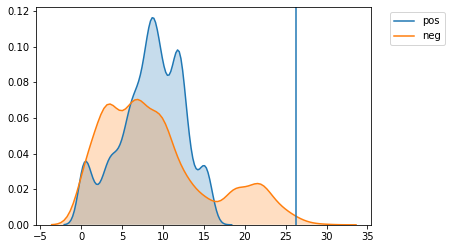

In [110]:
pt.distribution_plot()

In [86]:
import pdb

In [ ]:
p_val = len(np.where(result<=gt)[0])/no_permutation

In [ ]:
def permutation(x, y):
    n_x = len(x)
    n_y = len(y)
    x_y = x + y
    random.shuffle(x_y)
    return x_y

In [16]:
n_x = int(len(x))
n_y = int(len(y))
x_y = x + y
random.shuffle(x_y)

In [39]:
no_permutation = 10000

In [40]:
result = []
for i in range(0,no_permutation):
    # Shuffle the data:
    random.shuffle(x_y)
    # Compute permuted absolute difference of your two sampled distributions and store it in pD:
    result.append(np.average(x_y[0:n_x]) - np.average(x_y[n_y:]))

In [29]:
gt = np.average(x) - np.average(y)

In [35]:
p_val = len(np.where(result<=gt)[0])/no_permutation

In [52]:
result = np.array(result)

In [53]:
result_pos = result[result >= 0]
result_neg = result[result < 0]

In [58]:
result_neg = np.abs(result_neg)

In [61]:
sns.distplot

<function seaborn.distributions.distplot(a, bins=None, hist=True, kde=True, rug=False, fit=None, hist_kws=None, kde_kws=None, rug_kws=None, fit_kws=None, color=None, vertical=False, norm_hist=False, axlabel=None, label=None, ax=None)>

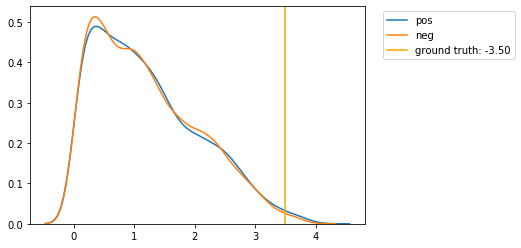

In [112]:
sns.distplot(result_pos, hist = False, label = "pos")
sns.distplot(result_neg, hist = False, label = "neg" )

plt.axvline(np.abs(gt), 0, 1, c = "Blue" if gt >= 0 else "Orange",label = "ground truth: " + '%.2f' % gt)
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.show()

# bi normial test

In [3]:
import scipy
from scipy.stats import binom_test

In [5]:
binom_test(5, 50, float(0.2))

0.07883064215278132